<a href="https://colab.research.google.com/github/harshitbansal184507/Linear-Regression-Models-/blob/main/old_car_price_predictor" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving train[1].csv to train[1].csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data= pd.read_csv("train[1].csv")

In [24]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [5]:
data.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
data["model"].nunique()

1827

In [8]:
null_data = data[data.isnull().any(axis=1)]


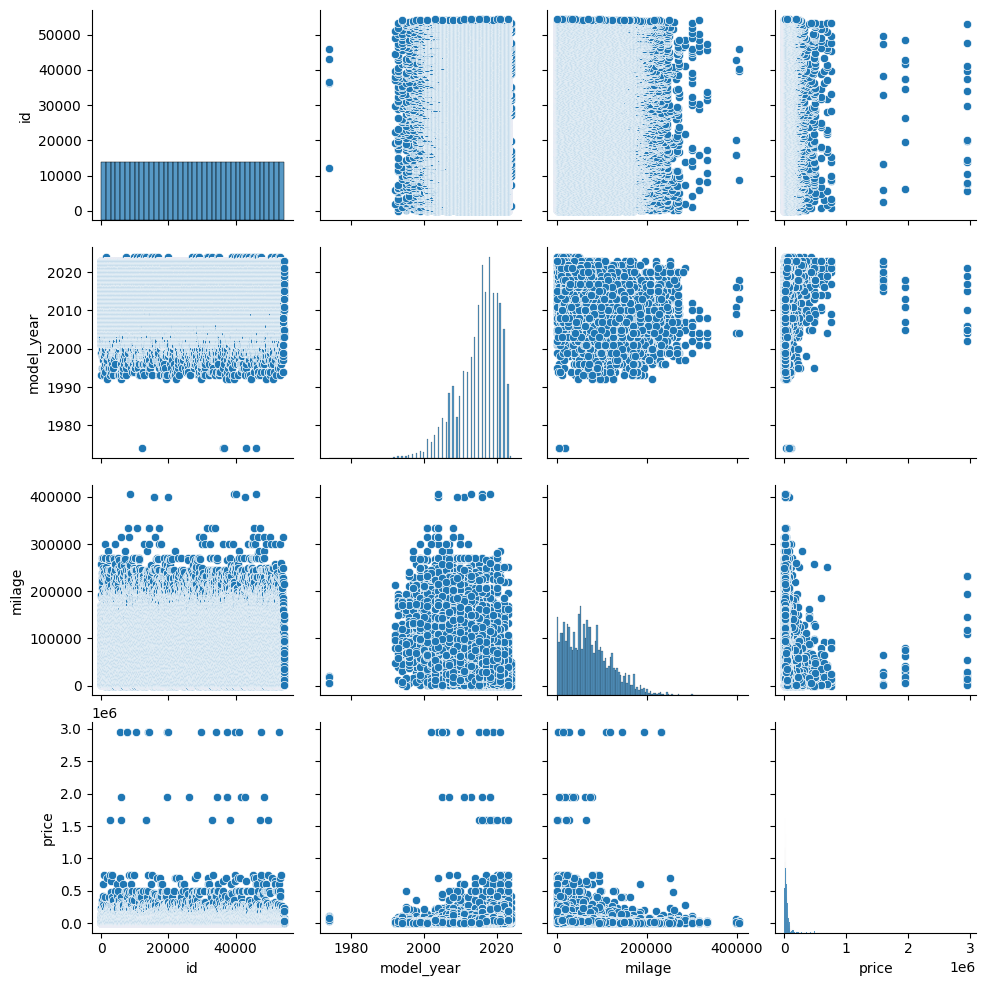

In [9]:
sns.pairplot(data)

In [10]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
...     data[[ 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       ]], data["price"], test_size=0.33, random_state=42)

In [67]:
X_train

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
30367,BMW,X6 xDrive40i,2020,41000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Red,Brown,None reported,Yes
27661,Ford,F-150 XLT,2021,67516,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,Automatic,Gray,Medium Earth Gray,None reported,Yes
1732,Ford,Focus SE,2016,91000,Gasoline,160.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
12917,Mercedes-Benz,CLS-Class CLS 63 AMG S-Model 4MATIC,2015,71200,Gasoline,577.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes
31648,Ford,Taurus X Limited,2008,123500,Gasoline,263.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Beige,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
11284,Volvo,XC90 T6 Momentum,2018,60660,Gasoline,316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes
44732,Chevrolet,Corvette Z06,2015,28470,Gasoline,505.0HP 7.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Orange,Black,None reported,Yes
38158,MINI,Cooper S Base,2012,106000,Gasoline,181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes
860,Porsche,911 Turbo Cabriolet,2010,13500,Gasoline,480.0HP 3.6L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed M/T,Gray,Black,None reported,Yes


In [68]:
y_train

30367    59000
27661    76373
1732     12500
12917    52590
31648    10400
         ...  
11284    18000
44732    47500
38158    12000
860      76400
15795    30990
Name: price, Length: 36362, dtype: int64

In [69]:
objecttypes= X_train.dtypes[X_train.dtypes == "object"].index
print("In this dataset the categorical variables are : ")
print(objecttypes)

In this dataset the categorical variables are : 
Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
encoder = LabelEncoder()

In [72]:
X_train_copy = X_train.copy()

In [73]:
X_train_copy =X_train_copy.apply(encoder.fit_transform)

In [74]:
X_test_copy = X_test.copy()

In [75]:
X_test_copy=X_test_copy.apply(encoder.fit_transform)


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model= LinearRegression()

In [78]:
model.fit(X_train_copy, y_train)

LinearRegression()

In [79]:
print(model.intercept_)


36745.792788408005


In [80]:
predictions=model.predict(X_test_copy)


In [81]:
predictions

array([85436.90542176, 87900.76952824, 12354.08179671, ...,
       71441.5016002 , 30952.99921209, 21370.07553016])

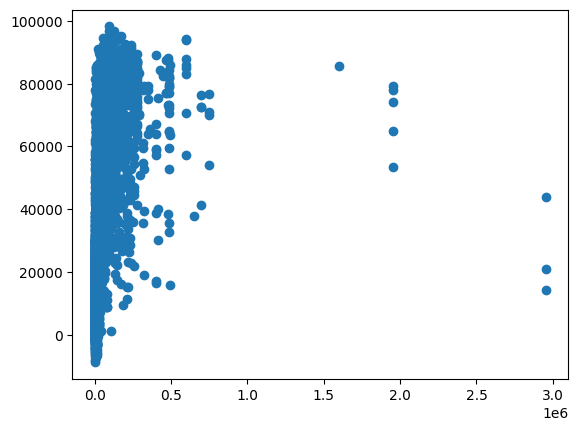

In [82]:
plt.scatter(y_test,predictions)


In [83]:
from sklearn import metrics


In [84]:
metrics.mean_absolute_error(y_test,predictions)


19638.6196379626

In [85]:
metrics.mean_squared_error(y_test,predictions)


4006536320.079836

In [86]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))


63297.20625809512

In [63]:
from google.colab import files
uploaded = files.upload()


Saving test[1].csv to test[1].csv


In [87]:
test_data= pd.read_csv("test[1].csv")

In [90]:
test_data_copy= test_data.copy()

In [91]:
test_data_copy = test_data_copy.apply(encoder.fit_transform)

In [92]:
test_result= model.predict(test_data_copy[[ 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       ]])

In [94]:
test_result= pd.DataFrame(test_result)

In [97]:
test_result.insert(0, "id",test_data["id"] , True)


In [99]:
test_result.rename(columns={0: "price"}, inplace=True)

In [100]:
test_result

,id,price
0,54273,37283.880087
1,54274,18635.877349
2,54275,41615.904142
3,54276,67866.308927
4,54277,29870.079543
...,...,...
36178,90451,78340.540154
36179,90452,4824.200623
36180,90453,10357.386964
36181,90454,66219.668150


In [102]:
pd.DataFrame(test_result).to_csv("submission.csv", index=False,)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
pd.DataFrame(test_result).to_csv("submission1.csv", index=False,)

In [107]:
from google.colab import files
files.download("submission1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>